# Task 2

## 1- Importing required libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
from collections import Counter
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
# For visualizing the clusters
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2- Loading the data and showing some high level information of dataset

In [4]:
# Importing the datasets
# student table
students=pd.read_csv("/Users/sajjad/Downloads/Project 1/students.csv")
display(students.head(8)) # show first 8 rows

# assignment table
assignments=pd.read_csv("/Users/sajjad/Downloads/Project 1/assignments.csv")
display(assignments.head(8)) # show first 8 rows

# grade table
grades=pd.read_csv("/Users/sajjad/Downloads/Project 1/grades.csv")
display(grades.head(8)) # show first 8 rows

# a summary of dataset 
students.info() 

assignments.info()

grades.info()


,student_id,student_name,student_level,major
0,288941,Matthew,1-Freshmen,English
1,463818,Austin,4-Senior,English
2,465208,Tyler,3-Junior,Engineering
3,383634,Samantha,3-Junior,Science
4,689448,Brittany,3-Junior,English
5,708774,Madison,4-Senior,Statistics and Math
6,283203,John,2-Sophomore,Philosophy
7,514068,Nicholas,1-Freshmen,Business


,assignment_id,assignment_category,assignment_value
0,1,Homework,8
1,2,Homework,8
2,3,Homework,12
3,4,Quiz,22
4,5,Homework,8
5,6,Homework,12
6,7,Homework,12
7,8,Quiz,18


,student_id,assignment_id,numeric_grade
0,288941,1,4
1,288941,2,7
2,288941,3,10
3,288941,4,16
4,288941,5,5
5,288941,6,8
6,288941,7,9
7,288941,8,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   student_id     180 non-null    int64 
 1   student_name   180 non-null    object
 2   student_level  180 non-null    object
 3   major          180 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   assignment_id        20 non-null     int64 
 1   assignment_category  20 non-null     object
 2   assignment_value     20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  --

## 3- Merging tables

In [6]:
# merging the tables
table = pd.merge(pd.merge(students, grades, on='student_id'), assignments, on='assignment_id')

display(table)

,student_id,student_name,student_level,major,assignment_id,numeric_grade,assignment_category,assignment_value
0,288941,Matthew,1-Freshmen,English,1,4,Homework,8
1,463818,Austin,4-Senior,English,1,5,Homework,8
2,465208,Tyler,3-Junior,Engineering,1,6,Homework,8
3,383634,Samantha,3-Junior,Science,1,6,Homework,8
4,689448,Brittany,3-Junior,English,1,5,Homework,8
...,...,...,...,...,...,...,...,...
3595,657590,Jonathan,2-Sophomore,Engineering,20,91,Exam,100
3596,894088,Robert,2-Sophomore,Philosophy,20,100,Exam,100
3597,678017,Hannah,2-Sophomore,Statistics and Math,20,78,Exam,100
3598,778403,Andrew,2-Sophomore,Science,20,66,Exam,100


## 4- Creating numeric score column for each student

In [7]:
# calculate the numeric grade for each student 
table['assignment_numeric_score'] = table['numeric_grade'] / table['assignment_value']

display(table)

,student_id,student_name,student_level,major,assignment_id,numeric_grade,assignment_category,assignment_value,assignment_numeric_score
0,288941,Matthew,1-Freshmen,English,1,4,Homework,8,0.500
1,463818,Austin,4-Senior,English,1,5,Homework,8,0.625
2,465208,Tyler,3-Junior,Engineering,1,6,Homework,8,0.750
3,383634,Samantha,3-Junior,Science,1,6,Homework,8,0.750
4,689448,Brittany,3-Junior,English,1,5,Homework,8,0.625
...,...,...,...,...,...,...,...,...,...
3595,657590,Jonathan,2-Sophomore,Engineering,20,91,Exam,100,0.910
3596,894088,Robert,2-Sophomore,Philosophy,20,100,Exam,100,1.000
3597,678017,Hannah,2-Sophomore,Statistics and Math,20,78,Exam,100,0.780
3598,778403,Andrew,2-Sophomore,Science,20,66,Exam,100,0.660


## Task 2 Question 1 : Which student level has the lowest mean assignment_numeric_score? ! The 'Freshmen' level has the lowest mean assignment_numeric_score, which is 0.71

In [8]:
# doing group by over student level and getting the mean of assigmnet numeric score
mean_scores_by_level = table.groupby('student_level')['assignment_numeric_score'].mean()

display(mean_scores_by_level)

student_level
1-Freshmen     0.710932
2-Sophomore    0.763995
3-Junior       0.771563
4-Senior       0.824910
Name: assignment_numeric_score, dtype: float64

## Task 2 Question 2 : Which student level has the highest mean assignment_numeric_score? ! The 'Senior' level has the highest mean assignment_numeric_score, which is 0.825

## Task 2 Question 3 : (Bonus Question) Is there a statistically significant difference between the mean assignment_numeric_score of freshmen and seniors? If so, is the difference meaningful? Why or why not? 

### Answer : For checking the significance difference between the means of assignment_numeric_score of freshmen and seniors, we use hypothesis testing : Null Hypothesis (H0): There is no significant difference in the mean assignment_numeric_score between freshmen and seniors , Alternative Hypothesis (H1): There is a significant difference in the mean assignment_numeric_score between freshmen and seniors. Then, we perform the T-Test and to get the test statistics and P-value. As indicated below: P-value = 7.896304165134023e-59 is less than the significance level (alpha=0.05) .So, it indicated that we have enough evidence to reject the null hypothesis and conclude that there is significant difference in the mean assignment_numeric_score between freshmen and seniors. P-value is almost close to zero that it shows the distribution of the scores of freshmen and seniors are completley differenet,and these are not coming from same distribution. Hence, we can say difference is meaningful and those are statistically different. 

In [9]:
# Freshmen and Seniors
freshmen_scores = table[table['student_level'] == '1-Freshmen']['assignment_numeric_score']
senior_scores = table[table['student_level'] == '4-Senior']['assignment_numeric_score']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(freshmen_scores, senior_scores)
display(t_statistic, p_value)

-16.79551613893097

7.896304165134023e-59

## Task 2 Question 4 : Which major has the highest mean assignment_numeric_score? ! The 'Statistics and Math' major has the highest mean assignment_numeric_score, which is 0.8015

In [10]:
# doing group by over student major and getting the mean of assigmnet numeric score
mean_scores_by_major = table.groupby('major')['assignment_numeric_score'].mean()

display(mean_scores_by_major)

major
Business               0.739079
Engineering            0.702410
English                0.746820
Philosophy             0.788164
Science                0.780650
Statistics and Math    0.801483
Name: assignment_numeric_score, dtype: float64

# Task 3

In [11]:
# showing the table
table

,student_id,student_name,student_level,major,assignment_id,numeric_grade,assignment_category,assignment_value,assignment_numeric_score
0,288941,Matthew,1-Freshmen,English,1,4,Homework,8,0.500
1,463818,Austin,4-Senior,English,1,5,Homework,8,0.625
2,465208,Tyler,3-Junior,Engineering,1,6,Homework,8,0.750
3,383634,Samantha,3-Junior,Science,1,6,Homework,8,0.750
4,689448,Brittany,3-Junior,English,1,5,Homework,8,0.625
...,...,...,...,...,...,...,...,...,...
3595,657590,Jonathan,2-Sophomore,Engineering,20,91,Exam,100,0.910
3596,894088,Robert,2-Sophomore,Philosophy,20,100,Exam,100,1.000
3597,678017,Hannah,2-Sophomore,Statistics and Math,20,78,Exam,100,0.780
3598,778403,Andrew,2-Sophomore,Science,20,66,Exam,100,0.660


## Create table of score means and weighted average for each student

In [12]:
# creating table that includes the mean of "Exam","Homework", and "Quiz" for each student

average_student = pd.DataFrame(table.groupby(['student_id', 'assignment_category'])['assignment_numeric_score'].agg(mean_category='mean').reset_index())# now we have three rows for each student

display(average_student)

# creating weighted average for each student
weights = {'Exam': 0.60, 'Quiz': 0.15, 'Homework': 0.25}
weighted_average_student = average_student.groupby(['student_id', 'assignment_category'])['mean_category'].mean().unstack().reset_index()

weighted_average_student['weighted_course_numeric_grade'] = (
    (weighted_average_student['Exam'] * weights['Exam']) +
    (weighted_average_student['Quiz'] * weights['Quiz']) +
    (weighted_average_student['Homework'] * weights['Homework'])
)

display(weighted_average_student)

,student_id,assignment_category,mean_category
0,104517,Exam,0.770000
1,104517,Homework,0.805754
2,104517,Quiz,0.878157
3,104619,Exam,0.715000
4,104619,Homework,0.704167
...,...,...,...
535,992120,Homework,0.711310
536,992120,Quiz,0.815404
537,996584,Exam,0.760000
538,996584,Homework,0.666667


assignment_category,student_id,Exam,Homework,Quiz,weighted_course_numeric_grade
0,104517,0.770,0.805754,0.878157,0.795162
1,104619,0.715,0.704167,0.765783,0.719909
2,107031,0.800,0.718254,0.772854,0.775492
3,131516,0.660,0.725794,0.738258,0.688187
4,137711,0.690,0.739683,0.730556,0.708504
...,...,...,...,...,...
175,975262,0.695,0.739286,0.784722,0.719530
176,978987,0.925,0.818651,0.915909,0.897049
177,986695,0.655,0.641071,0.633460,0.648287
178,992120,0.830,0.711310,0.815404,0.798138


## Create the Letter Grade for each student

In [13]:
# Initializing an empty list to store course letter grades
course_letter_grades = []

# Calculating the course_letter_grade based on conditions using if-else
for grade in weighted_average_student['weighted_course_numeric_grade']:
    if grade > 0.9:
        course_letter_grades.append('A')
    elif grade >= 0.8:
        course_letter_grades.append('B')
    elif grade >= 0.7:
        course_letter_grades.append('C')
    elif grade >= 0.6:
        course_letter_grades.append('D')
    else:
        course_letter_grades.append('F')
        
# Adding the course letter grades to the DataFrame
weighted_average_student['course_letter_grade'] = course_letter_grades

# Reset the index to have 'student_id' as a regular column
weighted_average_student.reset_index(inplace=True)

# Display the result
weighted_average_student

assignment_category,index,student_id,Exam,Homework,Quiz,weighted_course_numeric_grade,course_letter_grade
0,0,104517,0.770,0.805754,0.878157,0.795162,C
1,1,104619,0.715,0.704167,0.765783,0.719909,C
2,2,107031,0.800,0.718254,0.772854,0.775492,C
3,3,131516,0.660,0.725794,0.738258,0.688187,D
4,4,137711,0.690,0.739683,0.730556,0.708504,C
...,...,...,...,...,...,...,...
175,175,975262,0.695,0.739286,0.784722,0.719530,C
176,176,978987,0.925,0.818651,0.915909,0.897049,B
177,177,986695,0.655,0.641071,0.633460,0.648287,D
178,178,992120,0.830,0.711310,0.815404,0.798138,C


In [14]:
# changing columns' names
weighted_average_student = weighted_average_student.rename(columns={'Exam': 'avg_exam', 'Homework': 'avg_hw', 'Quiz': 'avg_quiz'})
weighted_average_student

assignment_category,index,student_id,avg_exam,avg_hw,avg_quiz,weighted_course_numeric_grade,course_letter_grade
0,0,104517,0.770,0.805754,0.878157,0.795162,C
1,1,104619,0.715,0.704167,0.765783,0.719909,C
2,2,107031,0.800,0.718254,0.772854,0.775492,C
3,3,131516,0.660,0.725794,0.738258,0.688187,D
4,4,137711,0.690,0.739683,0.730556,0.708504,C
...,...,...,...,...,...,...,...
175,175,975262,0.695,0.739286,0.784722,0.719530,C
176,176,978987,0.925,0.818651,0.915909,0.897049,B
177,177,986695,0.655,0.641071,0.633460,0.648287,D
178,178,992120,0.830,0.711310,0.815404,0.798138,C


# Create the final_grades Table

In [15]:
# Merge table1s with selected columns from 1st table
final_grades = students.merge(weighted_average_student, on='student_id')
# Display the merged table
final_grades

,student_id,student_name,student_level,major,index,avg_exam,avg_hw,avg_quiz,weighted_course_numeric_grade,course_letter_grade
0,288941,Matthew,1-Freshmen,English,36,0.740,0.686310,0.701641,0.720824,C
1,463818,Austin,4-Senior,English,71,0.770,0.818849,0.796086,0.786125,C
2,465208,Tyler,3-Junior,Engineering,72,0.690,0.735119,0.763510,0.712306,C
3,383634,Samantha,3-Junior,Science,56,0.865,0.796032,0.883965,0.850603,B
4,689448,Brittany,3-Junior,English,121,0.690,0.774008,0.779672,0.724453,C
...,...,...,...,...,...,...,...,...,...,...
175,657590,Jonathan,2-Sophomore,Engineering,111,0.850,0.612302,0.748232,0.775310,C
176,894088,Robert,2-Sophomore,Philosophy,160,0.855,0.801786,0.822475,0.836818,B
177,678017,Hannah,2-Sophomore,Statistics and Math,117,0.890,0.795040,0.826263,0.856699,B
178,778403,Andrew,2-Sophomore,Science,143,0.785,0.816865,0.840152,0.801239,B


## Summarize the grades

In [16]:
# for entire course
final_grades.course_letter_grade.value_counts()

C    91
B    57
D    27
A     5
Name: course_letter_grade, dtype: int64

### As indicated above, among all the students, there are 91 students who received a C grade, 57 students with a B grade, 27 students with a D grade, and only five students who achieved an A grade.

In [17]:
# by student level
count_grade_by_level = final_grades.groupby(['student_level','course_letter_grade']).size().reset_index(name='count')

display(count_grade_by_level)

,student_level,course_letter_grade,count
0,1-Freshmen,A,1
1,1-Freshmen,B,12
2,1-Freshmen,C,38
3,1-Freshmen,D,21
4,2-Sophomore,A,2
5,2-Sophomore,B,21
6,2-Sophomore,C,27
7,2-Sophomore,D,5
8,3-Junior,A,1
9,3-Junior,B,13


### As indicated above, majority of students across all academic levels received a C grade. The tables above provide valuable information regarding the distribution of students across various levels and their corresponding academic performances.

In [18]:
# by student major
count_grade_by_major = final_grades.groupby(['major','course_letter_grade']).size().reset_index(name='count')

display(count_grade_by_major)

,major,course_letter_grade,count
0,Business,B,6
1,Business,C,16
2,Business,D,5
3,Engineering,B,1
4,Engineering,C,35
5,Engineering,D,16
6,English,B,7
7,English,C,19
8,English,D,4
9,Philosophy,A,2


### based on the above table : Business majors have a notable number of students with B and C grades, while a smaller number received D grades.Engineering students primarily achieved C grades, with fewer students earning B and D grades. English majors have a distribution of students across B, C, and D grades, with C grades being the most common.Philosophy students received grades ranging from A to D, with the majority earning B and C grades.Science majors show a concentration of students in the B and C grade categories, with a smaller number receiving A and D grades.Students majoring in Statistics and Math obtained grades spanning from A to C, with B grades being the most prevalent.

## Task 3 Question 1 Which student level has the highest weighted_course_numeric_grade? Senior level has the highest weighted_course_numeric_grade with 0.95

In [19]:
# by student level
max_weightedgrade_by_level = final_grades.groupby('student_level')['weighted_course_numeric_grade'].max()

display(max_weightedgrade_by_level)

student_level
1-Freshmen     0.908011
2-Sophomore    0.916681
3-Junior       0.909568
4-Senior       0.950320
Name: weighted_course_numeric_grade, dtype: float64

## Task 3 Question 2 Which major has the lowest weighted_course_numeric_grade? Engineering major has the lowest weighted_course_numeric_grade with 0.643624

In [20]:
# by student major
min_weightedgrade_by_major = final_grades.groupby('major')['weighted_course_numeric_grade'].min()

display(min_weightedgrade_by_major)

major
Business               0.655016
Engineering            0.643624
English                0.662942
Philosophy             0.678494
Science                0.680043
Statistics and Math    0.712863
Name: weighted_course_numeric_grade, dtype: float64

## Task 3 Question 3 : Create a visual (chart) that shows the distribution of course_letter_grades

,course_letter_grade,count
0,A,5
1,B,57
2,C,91
3,D,27


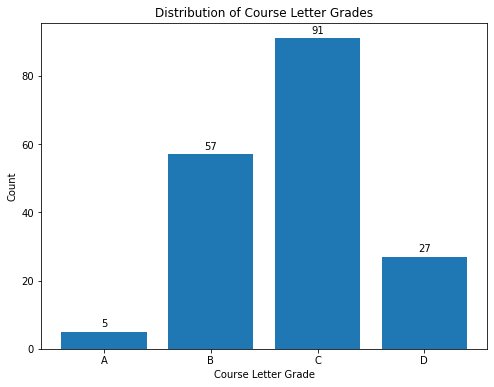

In [21]:
# Group data by course_letter_grade and calculate the sum of counts for each grade
grade_counts = final_grades.groupby(['course_letter_grade']).size().reset_index(name='count')
display(grade_counts)

# Add number hover labels to the bars
plt.figure(figsize=(8, 6))
bars = plt.bar(grade_counts['course_letter_grade'], grade_counts['count'])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset for better placement
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Course Letter Grade')
plt.ylabel('Count')
plt.title('Distribution of Course Letter Grades')
plt.show()

## Task 3 Question 4 : Create other visuals to help make sense of this data

In [22]:
# table that we already created for counting the letter grades for each major
count_grade_by_major

,major,course_letter_grade,count
0,Business,B,6
1,Business,C,16
2,Business,D,5
3,Engineering,B,1
4,Engineering,C,35
5,Engineering,D,16
6,English,B,7
7,English,C,19
8,English,D,4
9,Philosophy,A,2


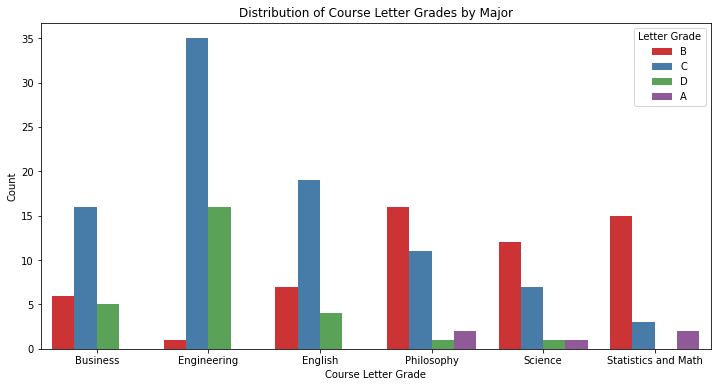

In [24]:
# Create a grouped bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=count_grade_by_major, x='major', y='count', hue='course_letter_grade', palette='Set1')

plt.xlabel('Course Letter Grade')
plt.ylabel('Count')
plt.title('Distribution of Course Letter Grades by Major')
plt.legend(title='Letter Grade', loc='upper right')
plt.show()

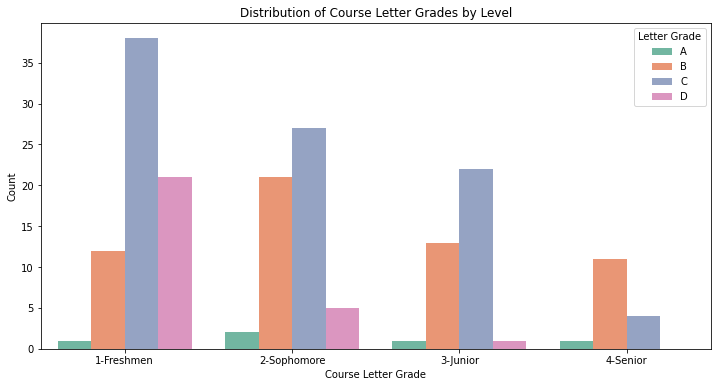

In [31]:
# Distribution of Course Letter Grades by Level
count_grade_by_level
# Create a grouped bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=count_grade_by_level, x='student_level', y='count', hue='course_letter_grade', palette='Set2')

plt.xlabel('Course Letter Grade')
plt.ylabel('Count')
plt.title('Distribution of Course Letter Grades by Level')
plt.legend(title='Letter Grade', loc='upper right')
plt.show()

### Cluster Analysis

In [75]:
# Creating required dataset for cluster analysis and removing unnecessary columns
df=table[["student_level","major","assignment_numeric_score"]]

In [76]:
df

,student_level,major,assignment_numeric_score
0,1-Freshmen,English,0.500
1,4-Senior,English,0.625
2,3-Junior,Engineering,0.750
3,3-Junior,Science,0.750
4,3-Junior,English,0.625
...,...,...,...
3595,2-Sophomore,Engineering,0.910
3596,2-Sophomore,Philosophy,1.000
3597,2-Sophomore,Statistics and Math,0.780
3598,2-Sophomore,Science,0.660


In [77]:
# create dummy variables
df=pd.get_dummies(df)

In [78]:
df

,assignment_numeric_score,student_level_1-Freshmen,student_level_2-Sophomore,student_level_3-Junior,student_level_4-Senior,major_Business,major_Engineering,major_English,major_Philosophy,major_Science,major_Statistics and Math
0,0.500,1,0,0,0,0,0,1,0,0,0
1,0.625,0,0,0,1,0,0,1,0,0,0
2,0.750,0,0,1,0,0,1,0,0,0,0
3,0.750,0,0,1,0,0,0,0,0,1,0
4,0.625,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3595,0.910,0,1,0,0,0,1,0,0,0,0
3596,1.000,0,1,0,0,0,0,0,1,0,0
3597,0.780,0,1,0,0,0,0,0,0,0,1
3598,0.660,0,1,0,0,0,0,0,0,1,0


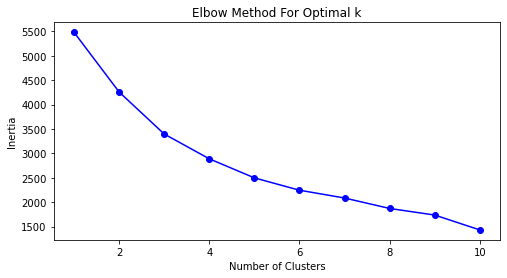

In [53]:
# Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [54]:
# Applying KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(df)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

In [55]:
df

,assignment_numeric_score,student_level_1-Freshmen,student_level_2-Sophomore,student_level_3-Junior,student_level_4-Senior,major_Business,major_Engineering,major_English,major_Philosophy,major_Science,major_Statistics and Math,Cluster
0,0.500,1,0,0,0,0,0,1,0,0,0,1
1,0.625,0,0,0,1,0,0,1,0,0,0,3
2,0.750,0,0,1,0,0,1,0,0,0,0,0
3,0.750,0,0,1,0,0,0,0,0,1,0,0
4,0.625,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3595,0.910,0,1,0,0,0,1,0,0,0,0,2
3596,1.000,0,1,0,0,0,0,0,1,0,0,2
3597,0.780,0,1,0,0,0,0,0,0,0,1,2
3598,0.660,0,1,0,0,0,0,0,0,1,0,2


# Task 4 : How can we develop an automated report?

### To set up an automated report system for processing data across multiple courses and calculating final grades, we can create a Python pipeline. First, import CSV files into the pipeline. Then, perform data preprocessing tasks such as checking for missing values, duplicated entries, and outliers. Next, create a Python class that takes the dataset's name as input and conducts various aggregations to calculate students' final grades based on predefined criteria. Additionally, the class can generate visualizations, such as histograms or pie charts, to illustrate the distribution of grades for different assignments. This pipeline offers a modular and adaptable approach to efficiently handle diverse datasets, grading criteria, and reporting requirements, making it easier to scale and generalize the workflow for various courses and data sources.